# Computer Vision (Image operators and filters)

By the end of this lab, you will get hands on experience working with:

*   Image Handling
*   Image Manipulation
*   Histogram and Histogram Equalization
*   Basic filtering techniques

<!-- ### **Remember this is a graded exercise.** -->

**Reminder**:

*   For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.
*   Add sufficient comments and explanations wherever necessary.

---


In [2]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology 

# Channels and color spaces

### **Exercise: Image Creation and Color Manipulation**

*   Create a 100 x 100 image for each of the below visualization

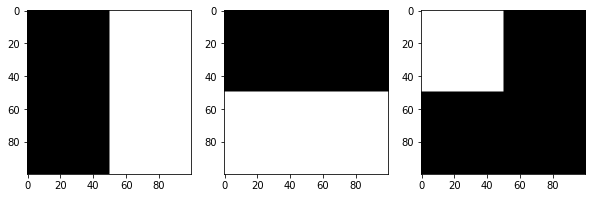

*   Visualize the created images in a 1 x 3 subplot using matplotlib.


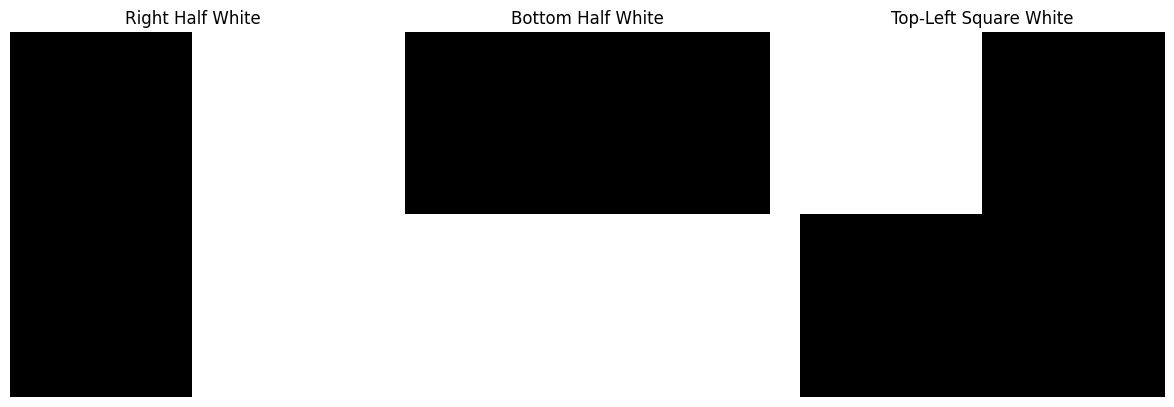

In [6]:
img1 = np.zeros((100, 100))
img2 = np.zeros((100, 100))
img3 = np.zeros((100, 100))

img1[:, 50:] = 1

img2[50:, :] = 1

img3[:50, :50] = 1

fig, axes = plt.subplots(1, 3, figsize=(12, 4))

axes[0].imshow(img1, cmap='gray')
axes[0].set_title('Right Half White')
axes[1].imshow(img2, cmap='gray')
axes[1].set_title('Bottom Half White')
axes[2].imshow(img3, cmap='gray')
axes[2].set_title('Top-Left Square White')


for ax in axes:
    ax.axis('off')

plt.tight_layout()
plt.show()

*   Use the above three images to create the following image

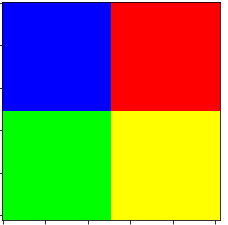
*Hint: Remember channels and color spaces*

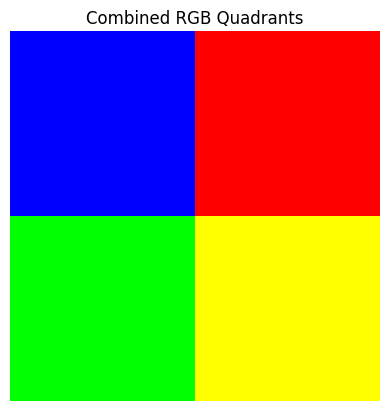

In [7]:
red_channel = np.zeros((100, 100))
green_channel = np.zeros((100, 100))
blue_channel = np.zeros((100, 100))

red_channel[:50, 50:] = 1

green_channel[50:, :50] = 1

blue_channel[:50, :50] = 1

red_channel[50:, 50:] = 1
green_channel[50:, 50:] = 1

rgb_image = np.stack([red_channel, green_channel, blue_channel], axis=-1)

plt.imshow(rgb_image)
plt.axis('off')
plt.title("Combined RGB Quadrants")
plt.show()



### **Exercise: Color Manipulation**

*   Read the image 'sillas.jpg' from the images folder

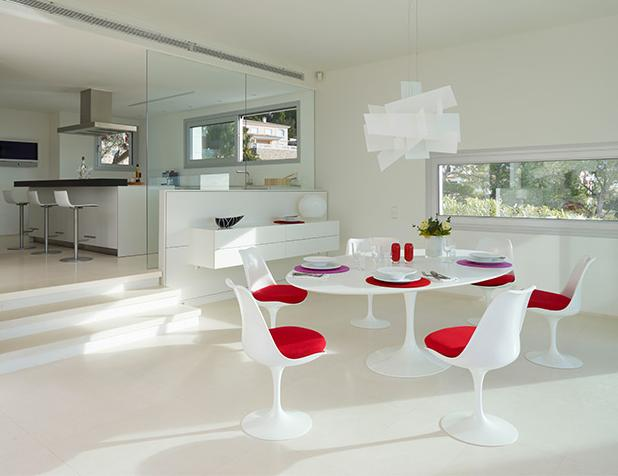

*   Extract individual channels and plot them using matplotlib subplot.



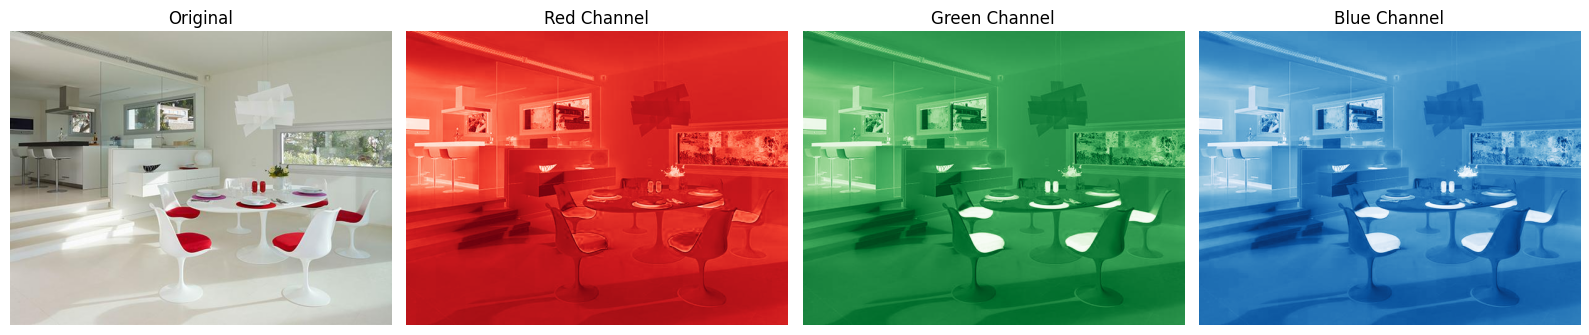

In [8]:
from skimage.io import imread
image = imread('images/sillas.jpg')

red_channel = image[:, :, 0]
green_channel = image[:, :, 1]
blue_channel = image[:, :, 2]

fig, axes = plt.subplots(1, 4, figsize=(16, 4))

axes[0].imshow(image)
axes[0].set_title("Original")
axes[0].axis('off')

axes[1].imshow(red_channel, cmap='Reds')
axes[1].set_title("Red Channel")
axes[1].axis('off')

axes[2].imshow(green_channel, cmap='Greens')
axes[2].set_title("Green Channel")
axes[2].axis('off')

axes[3].imshow(blue_channel, cmap='Blues')
axes[3].set_title("Blue Channel")
axes[3].axis('off')

plt.tight_layout()
plt.show()



*   The color **red** looks too bright for the eyes. Isn't it?? Lets change the color and see how it appears.
    *    Create a new image where everything that is **'red' is changed to 'blue'**.
*   Visualize the original image and the created image using matplotlib subplot.

In [ ]:
modified_image = image.copy()

red_threshold = 150
green_threshold = 100
blue_threshold = 100


red_mask = (
    (image[:, :, 0] > red_threshold) &  
    (image[:, :, 1] < green_threshold) & 
    (image[:, :, 2] < blue_threshold)  
)

modified_image[red_mask] = [0, 0, 255]

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

axes[0].imshow(image)
axes[0].set_title("Original Image")
axes[0].axis('off')

axes[1].imshow(modified_image)
axes[1].set_title("Red Changed to Blue")
axes[1].axis('off')

plt.tight_layout()
plt.show()



# Image Manipulation

### **Exercise: Image Operators**

*   You can find images 'model.png' and 'coat.png' in the images folder (First two images of the below visualization). Your task is to create an image from the given two images such a way that the model is wearing the coat (Third image in the visualization).
*   You can also find different textures in the images folder. Your task is to change the coat texture to any one of the given textures.
*   Visualize the images similar to the given visualization.

*Hint: Think masks!!!*

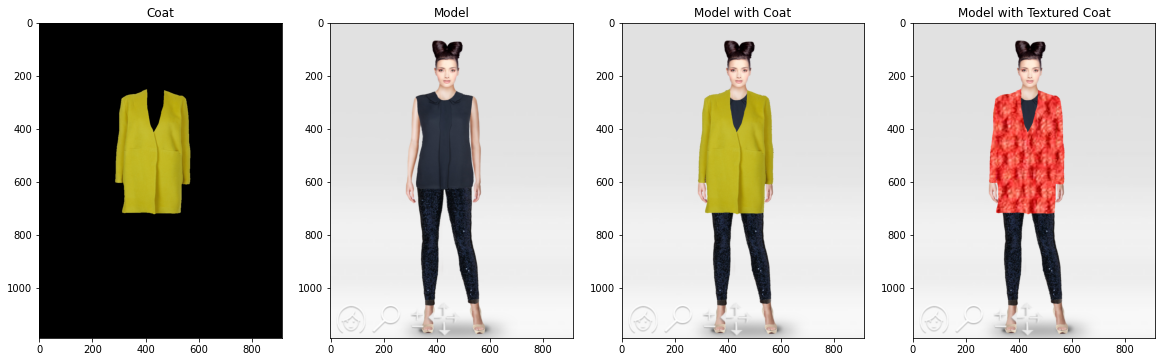

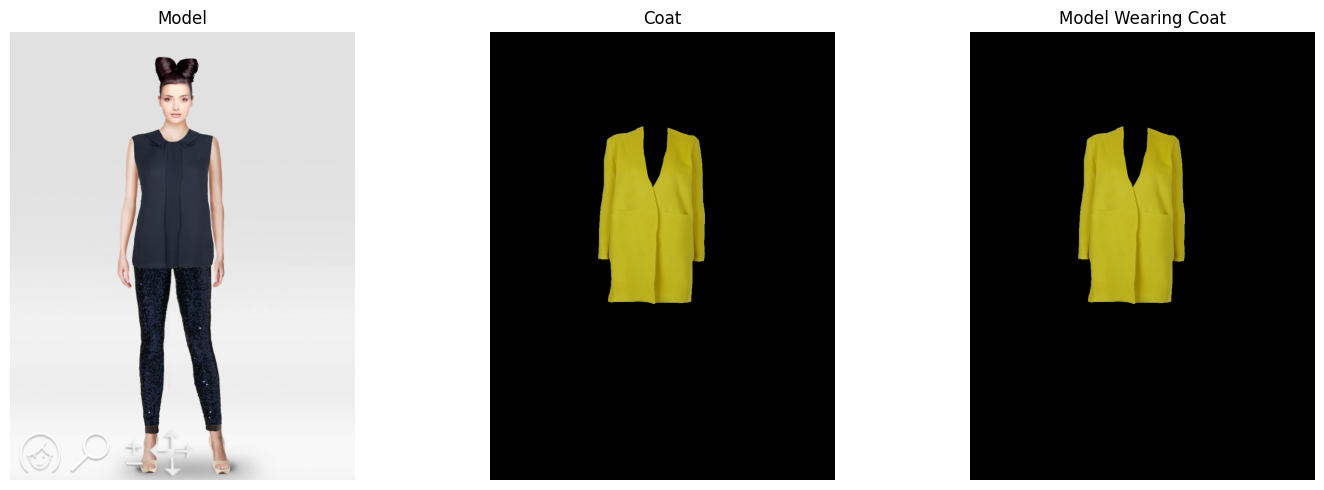

In [11]:
from skimage.io import imread
from skimage.color import rgb2gray
import numpy as np
import matplotlib.pyplot as plt

model = imread('images/model.png')
coat = imread('images/coat.png')

coat_rgb = coat[:, :, :3]
coat_gray = rgb2gray(coat_rgb)
mask = coat_gray < 0.95  

combined = model.copy()
combined[mask] = coat[mask]

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].imshow(model)
axes[0].set_title("Model")
axes[0].axis('off')

axes[1].imshow(coat)
axes[1].set_title("Coat")
axes[1].axis('off')

axes[2].imshow(combined)
axes[2].set_title("Model Wearing Coat")
axes[2].axis('off')

plt.tight_layout()
plt.show()


# Contrast Enhancement

### **Exercise: Histogram Computation**

*   Read the **'astronaut' image** from data module.
*   Convert the image to grayscale.
*   Compute the **histogram of the image.** *Hint: histogram function is available in skimage.exposure package*
*   Plot the histogram using matplotlib plot.




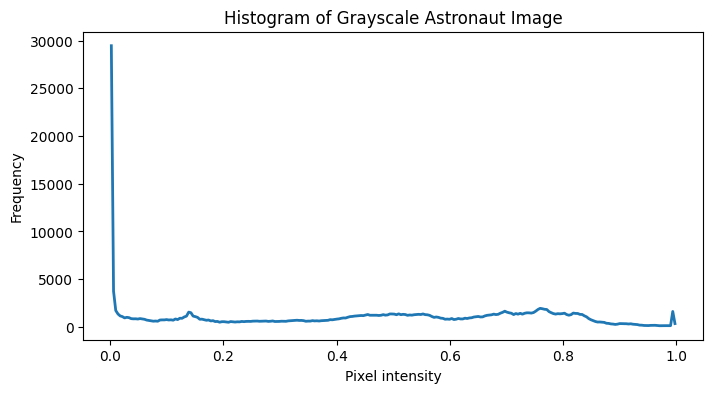

In [15]:
from skimage import data, color, exposure

image = data.astronaut()

gray_image = color.rgb2gray(image)

hist, bin_centers = exposure.histogram(gray_image)


plt.figure(figsize=(8, 4))
plt.plot(bin_centers, hist, lw=2)
plt.title("Histogram of Grayscale Astronaut Image")
plt.xlabel("Pixel intensity")
plt.ylabel("Frequency")
plt.show()

*   Change the bin count to 8 and compute the histogram of the image and plot the computed histogram using matplotlib plot.

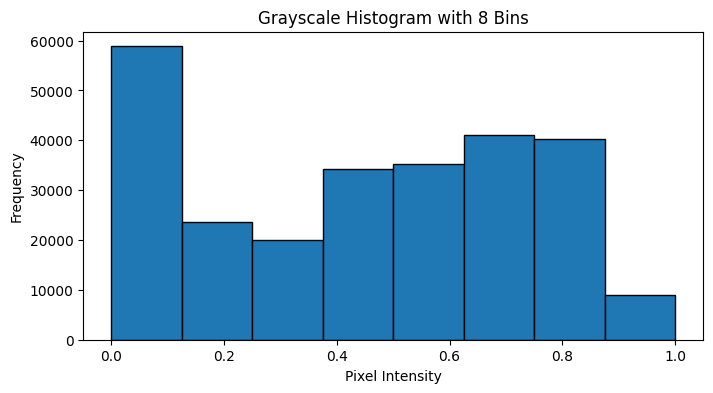

In [16]:
image = data.astronaut()
gray_image = color.rgb2gray(image)

hist, bins = np.histogram(gray_image, bins=8, range=(0, 1))

plt.figure(figsize=(8, 4))
plt.bar(bins[:-1], hist, width=(bins[1] - bins[0]), edgecolor='black', align='edge')
plt.title("Grayscale Histogram with 8 Bins")
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.show()






*   What happens when you change the bin count? Does your inference change based on the bin count? If yes, then how do you define the correct bin count.
*   What happens when the bin count is very low and what happens when it is very high?

